# Star Classification Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
df= pd.read_csv("StarClassificationDataset.csv")

df.head()

/var/folders/pk/wshkb_xj3r198l0yxrzjqsvh0000gn/T/ipykernel_20009/3544584227.py:1: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("StarClassificationDataset.csv")


,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,1.240000e+18,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY


In [8]:
df.isnull().sum()

object_ID         0
alpha             1
delta             2
UV_filter         0
green_filter      0
red_filter        0
near_IR_filter    0
IR_filter         0
run_ID            6
rerun_ID          0
cam_col           0
field_ID          0
spec_obj_ID       0
red_shift         0
plate_ID          0
MJD               0
fiber_ID          0
class             0
dtype: int64

In [10]:
X = df.drop(columns=['class', 'object_ID', 'spec_obj_ID', 'plate_ID', 'fiber_ID'])
y = df['class']

In [12]:
for col in X.columns:
    unique_types = X[col].map(type).unique()
    print(f"Column '{col}' has data types: {unique_types}")

Column 'alpha' has data types: [<class 'str'> <class 'float'>]
Column 'delta' has data types: [<class 'float'>]
Column 'UV_filter' has data types: [<class 'float'>]
Column 'green_filter' has data types: [<class 'float'>]
Column 'red_filter' has data types: [<class 'float'>]
Column 'near_IR_filter' has data types: [<class 'float'>]
Column 'IR_filter' has data types: [<class 'float'>]
Column 'run_ID' has data types: [<class 'str'> <class 'float'> <class 'int'>]
Column 'rerun_ID' has data types: [<class 'int'>]
Column 'cam_col' has data types: [<class 'int'>]
Column 'field_ID' has data types: [<class 'int'>]
Column 'red_shift' has data types: [<class 'float'>]
Column 'MJD' has data types: [<class 'int'>]


In [14]:
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

X.fillna(X.mean(), inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [20]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11889
         QSO       0.97      0.93      0.95      3792
        STAR       0.99      1.00      0.99      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



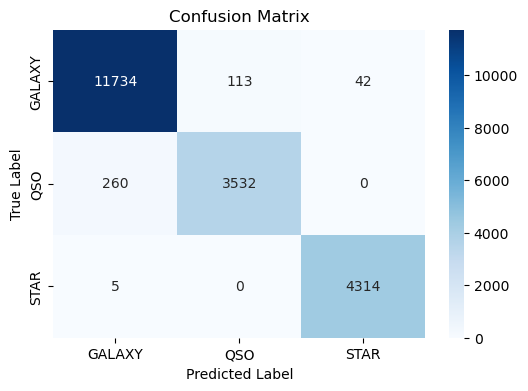

In [21]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Analysis of the Classification Report  

The model demonstrates strong performance with an overall accuracy of 98%, indicating its effectiveness on the dataset. Below are key insights:

### Class-wise Performance:

**GALAXY:**  
- **Precision:** 0.98 (Minimal incorrect classifications)  
- **Recall:** 0.99 (Most galaxies are correctly identified)  
- **F1-score:** 0.98 (Well-balanced precision and recall)  

**QSO (Quasi-Stellar Objects):**  
- **Precision:** 0.97 (Few incorrect classifications)  
- **Recall:** 0.93 (Some QSOs are misclassified into other categories)  
- **F1-score:** 0.95 (Lower than GALAXY and STAR due to recall)  

**STAR:**  
- **Precision:** 0.99 (Almost no incorrect classifications)  
- **Recall:** 1.00 (All stars correctly identified)  
- **F1-score:** 1.00 (Ideal classification performance)  

### Impact of Class Imbalance:

The dataset contains more galaxies (11,889) compared to QSOs (3,792) and stars (4,319).  
This imbalance may contribute to the lower recall (0.93) for QSOs, as the model might find it more challenging to classify the less frequent classes accurately.  

### Macro vs. Weighted Averages:

- **Macro average (equal weight for all classes):** Precision 0.98, Recall 0.97, F1-score 0.98  
- **Weighted average (adjusted for class distribution):** Precision 0.98, Recall 0.98, F1-score 0.98  

Since both metrics are closely aligned, the model does not show significant bias toward the majority class.

# California Housing Prices

In [24]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import fetch_california_housing

In [25]:
data = fetch_california_housing()
df1 = pd.DataFrame(data.data, columns=data.feature_names)
df1['Price'] = data.target

In [30]:
num_bins = math.ceil(1 + np.log2(len(df1)))

df1['Price_Bin'] = pd.qcut(df1['Price'], q=num_bins, labels=False)

In [32]:
X = df1.drop(columns=['Price', 'Price_Bin'])
y = df1['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=df1['Price_Bin'], random_state=42
)

df1.drop(columns=['Price_Bin'], inplace=True)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_preds = ridge_model.predict(X_test_scaled)

In [38]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_preds = lasso_model.predict(X_test_scaled)

In [40]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{model_name} Evaluation:")
    print(f"MAE  = {mae:.4f}")
    print(f"MSE  = {mse:.4f}")
    print(f"RMSE = {rmse:.4f}")

    return mae, mse, rmse

ridge_metrics = evaluate_model(y_test, ridge_preds, "Ridge Regression")
lasso_metrics = evaluate_model(y_test, lasso_preds, "Lasso Regression")


Ridge Regression Evaluation:
MAE  = 0.5405
MSE  = 0.5397
RMSE = 0.7346

Lasso Regression Evaluation:
MAE  = 0.6254
MSE  = 0.6900
RMSE = 0.8307


## Comparison of Ridge vs. Lasso Regression  

### **Ridge Regression (Lower Errors, Better Fit)**  
- **MAE:** 0.5405 (Lower, indicating more accurate predictions)  
- **MSE:** 0.5397 (Lower, suggesting fewer significant errors)  
- **RMSE:** 0.7346 (Lower, reflecting a better overall model fit)  

### **Lasso Regression (Higher Errors, Less Accurate Fit)**  
- **MAE:** 0.6254 (Higher, indicating reduced accuracy)  
- **MSE:** 0.6900 (Higher, implying more large errors)  
- **RMSE:** 0.8307 (Higher, showing a poorer overall fit)  

### **Key Insights:**  
1. **Ridge Regression outperformed Lasso** across all metrics, effectively retaining valuable features while preventing overfitting.  
2. **Lasso Regression resulted in higher errors**, likely due to some coefficients being reduced to zero, which may have led to the loss of important information.  
3. If **feature selection is a priority**, Lasso can be beneficial despite its increased error. However, for **better predictive accuracy**, Ridge is the more suitable option.